<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/DAUP/blob/main/DUAP_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")

print("Path to dataset files:", path)

100%|██████████| 5.13k/5.13k [00:00<00:00, 1.52MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5


In [2]:
ls /root/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5


dermatology_database_1.csv


In [3]:
# prompt: print the data for the above dataset

import pandas as pd

df = pd.read_csv("/root/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5/dermatology_database_1.csv")



In [4]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [8]:

import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df.replace('?', float('nan'), inplace=True)
for column in df.columns:
    if df[column].isnull().any():
        df[column] = pd.to_numeric(df[column], errors='coerce')
        df[column].fillna(df[column].mean(), inplace=True)

X = df.drop('class', axis=1)
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

SVM Accuracy: 0.9594594594594594
Random Forest Accuracy: 0.9864864864864865


In [9]:

import numpy as np

def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        outliers = find_outliers_iqr(df[col])
        df_cleaned = df_cleaned[~df_cleaned[col].isin(outliers)]
    return df_cleaned


numerical_cols = X.select_dtypes(include=np.number).columns
X_cleaned = remove_outliers_iqr(X, numerical_cols)

y_cleaned = y[X_cleaned.index]

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42
)

svm_classifier_cleaned = SVC(kernel='linear')
svm_classifier_cleaned.fit(X_train_cleaned, y_train_cleaned)
svm_predictions_cleaned = svm_classifier_cleaned.predict(X_test_cleaned)
svm_accuracy_cleaned = accuracy_score(y_test_cleaned, svm_predictions_cleaned)
print(f"SVM Accuracy (after outlier removal): {svm_accuracy_cleaned}")

rf_classifier_cleaned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_cleaned.fit(X_train_cleaned, y_train_cleaned)
rf_predictions_cleaned = rf_classifier_cleaned.predict(X_test_cleaned)
rf_accuracy_cleaned = accuracy_score(y_test_cleaned, rf_predictions_cleaned)
print(f"Random Forest Accuracy (after outlier removal): {rf_accuracy_cleaned}")

SVM Accuracy (after outlier removal): 1.0
Random Forest Accuracy (after outlier removal): 1.0


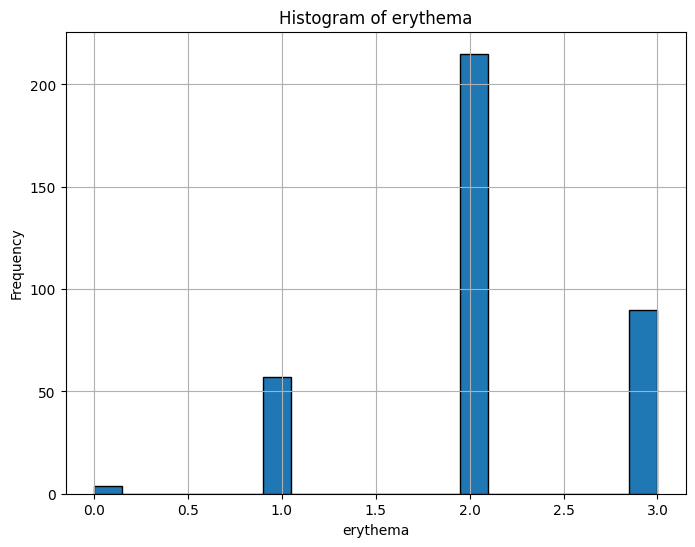

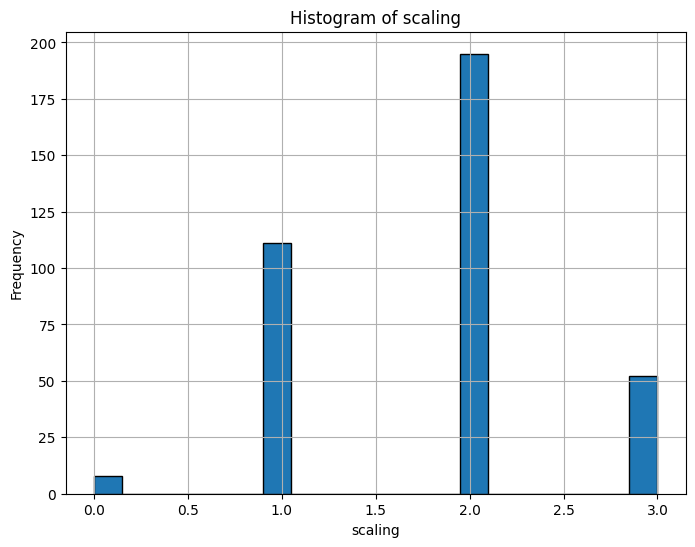

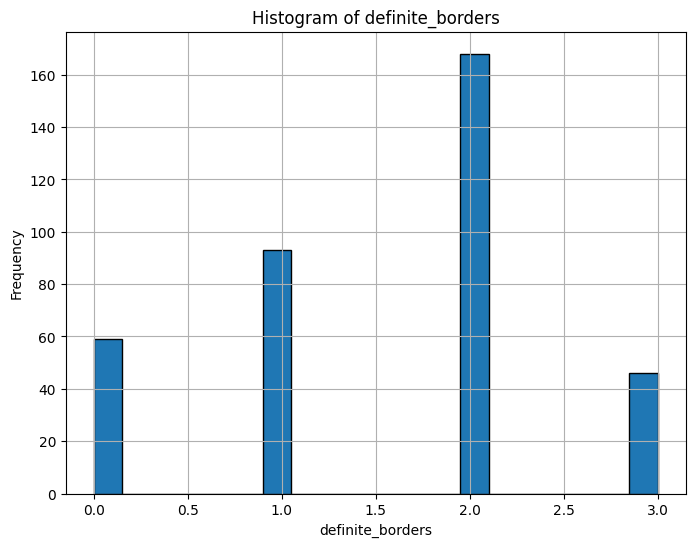

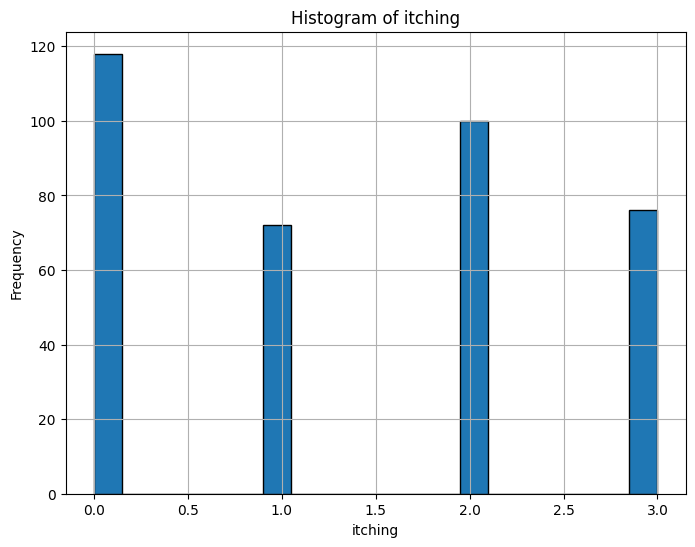

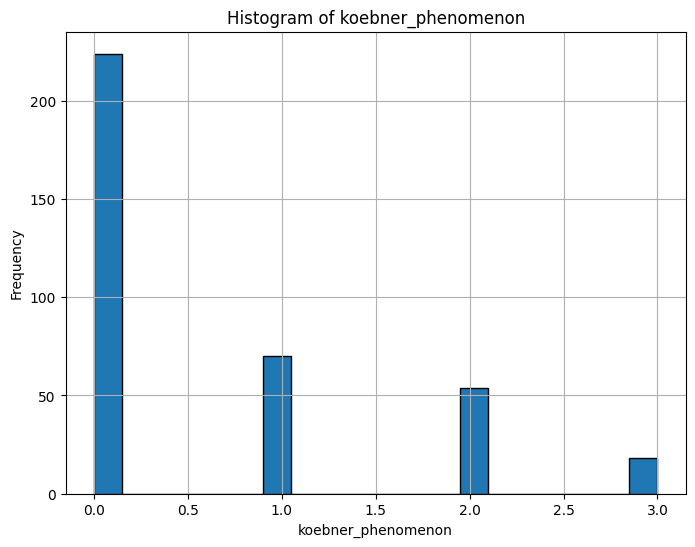

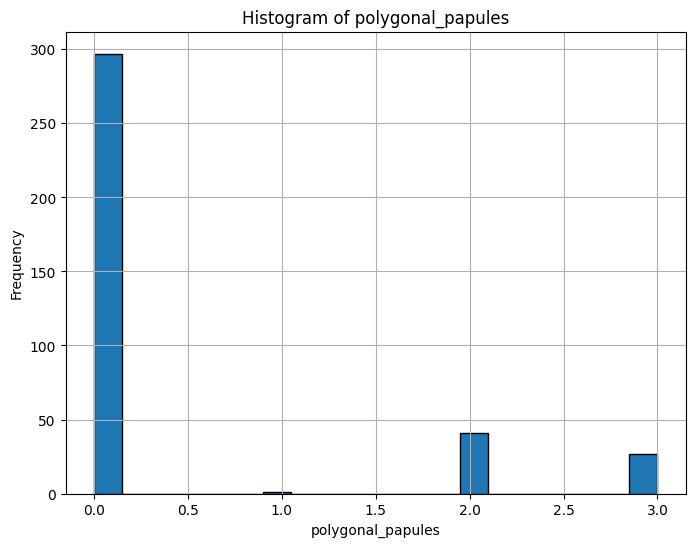

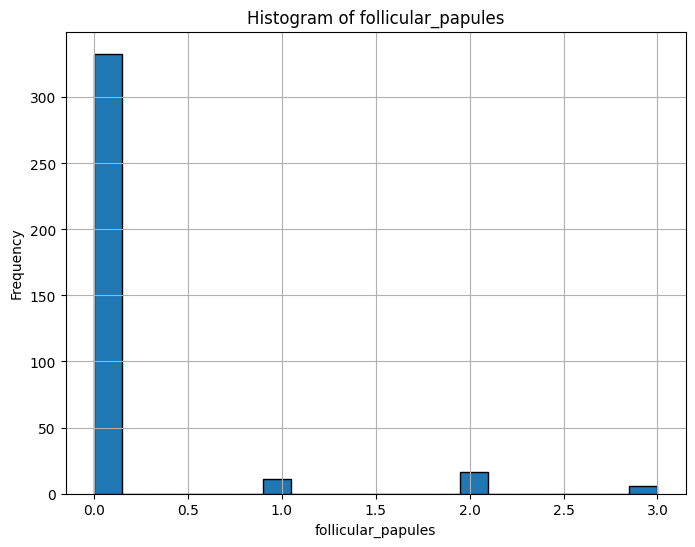

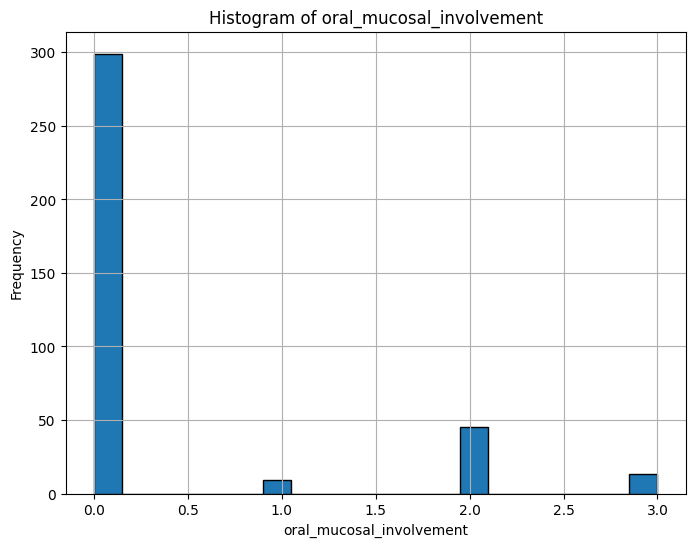

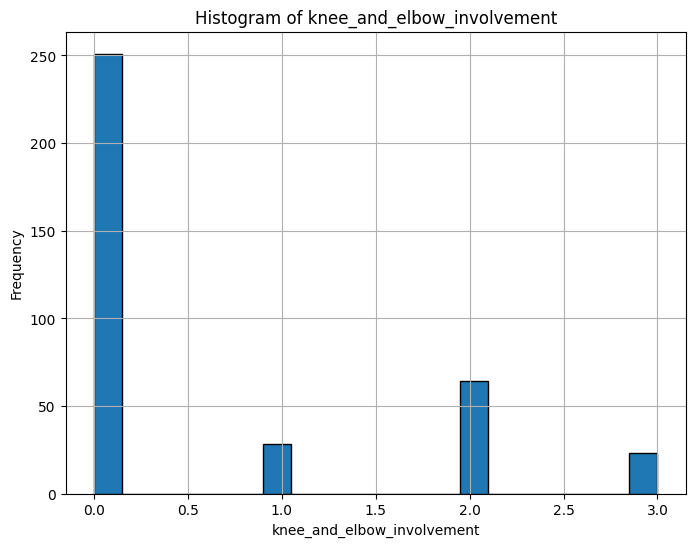

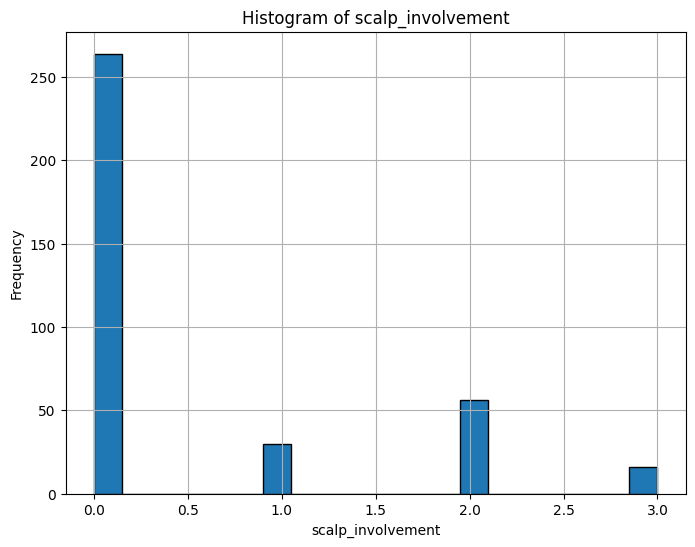

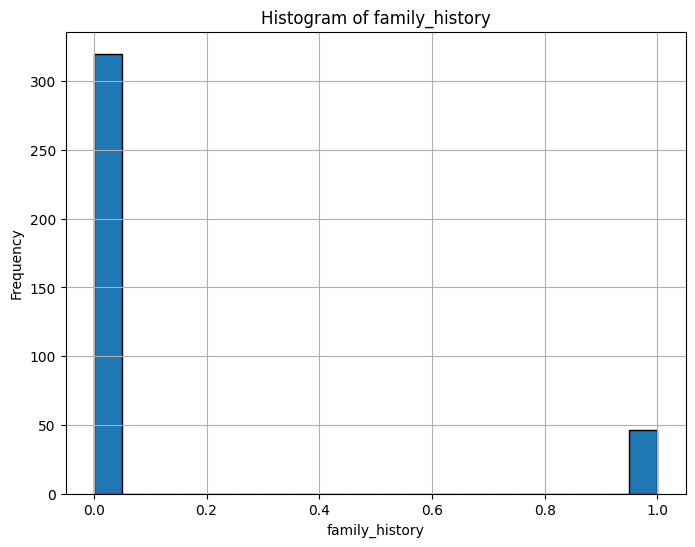

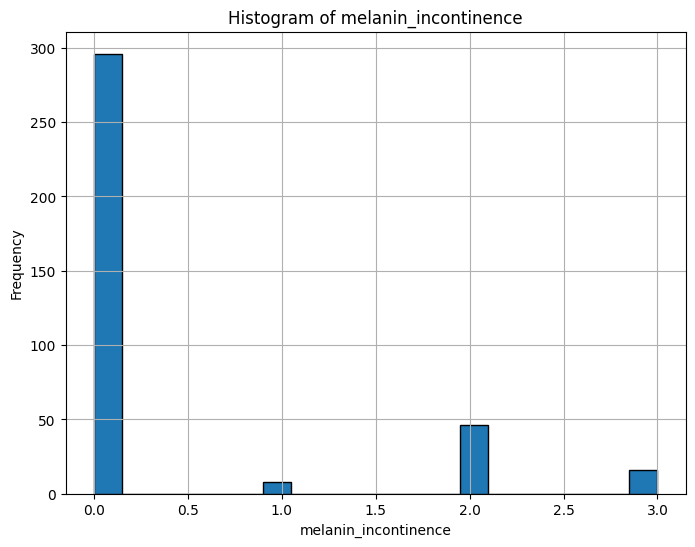

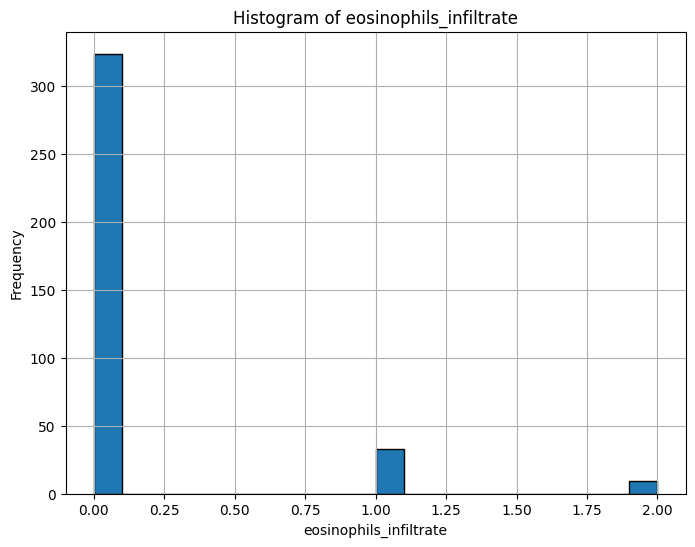

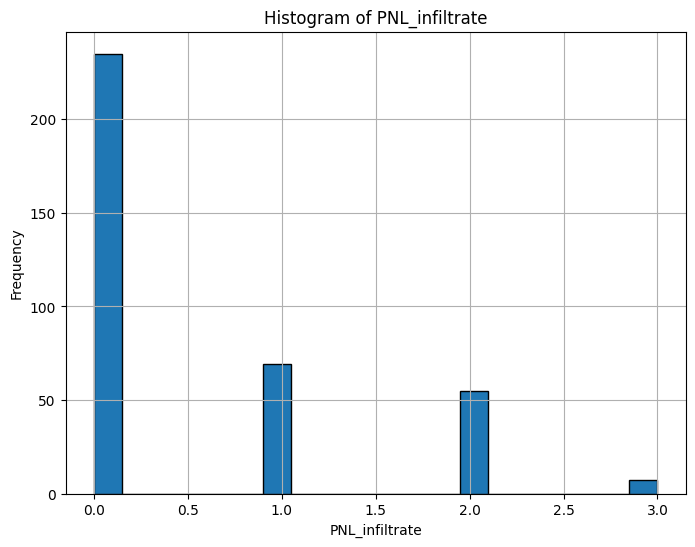

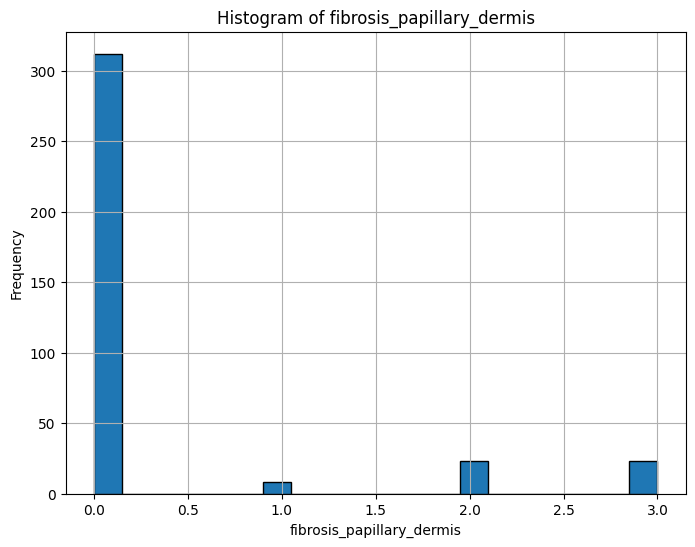

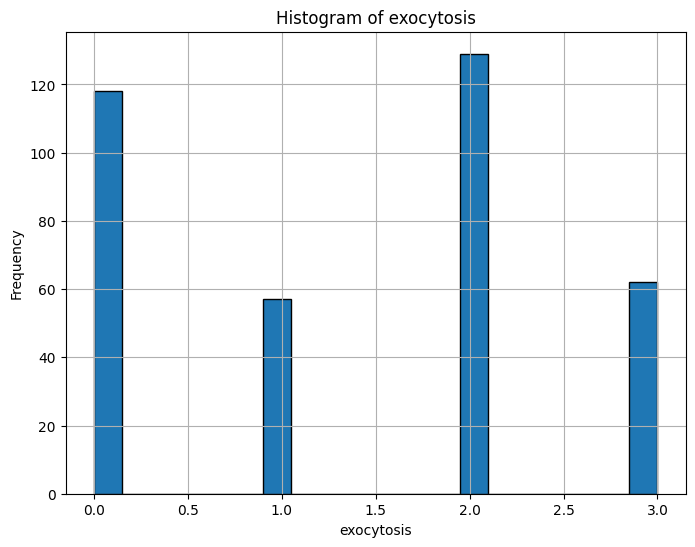

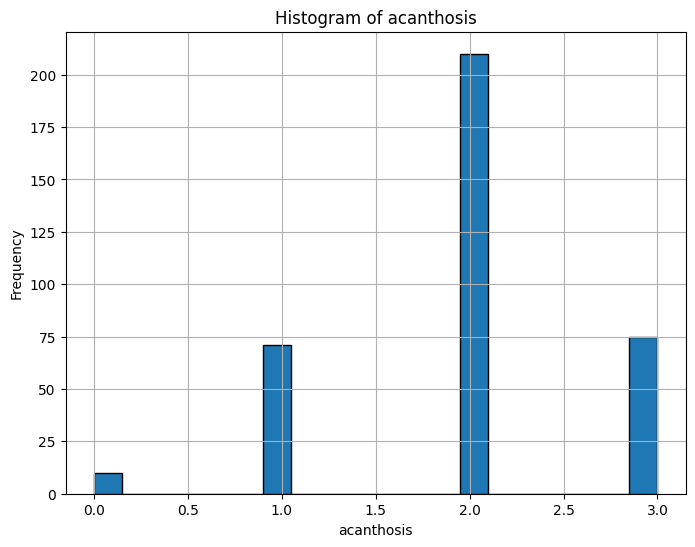

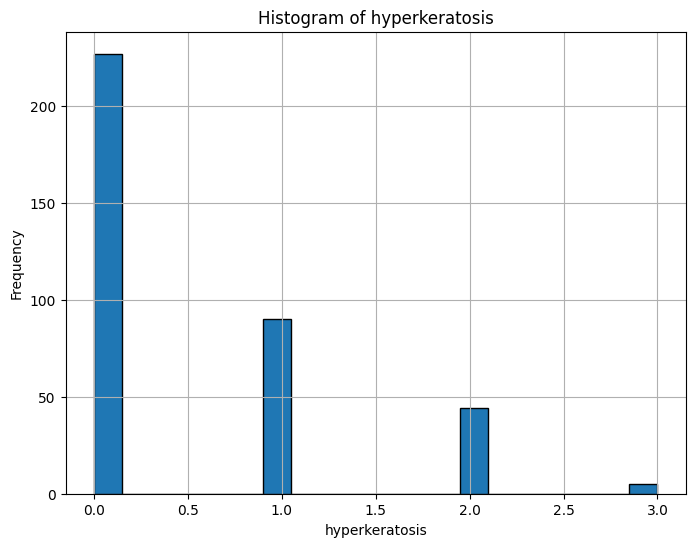

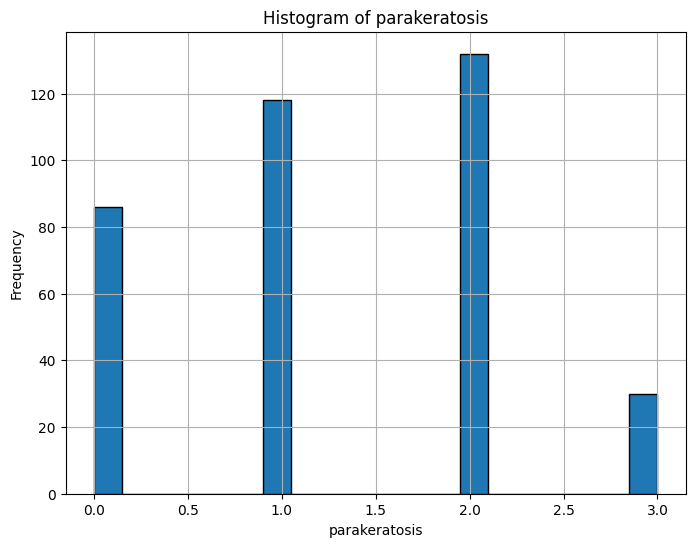

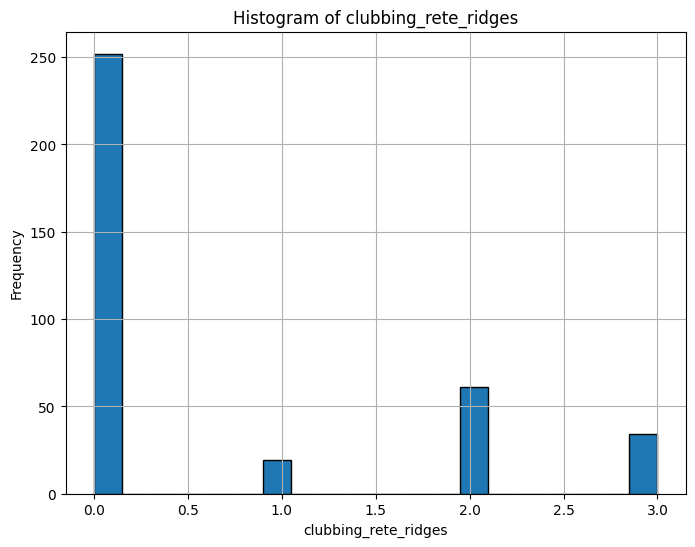

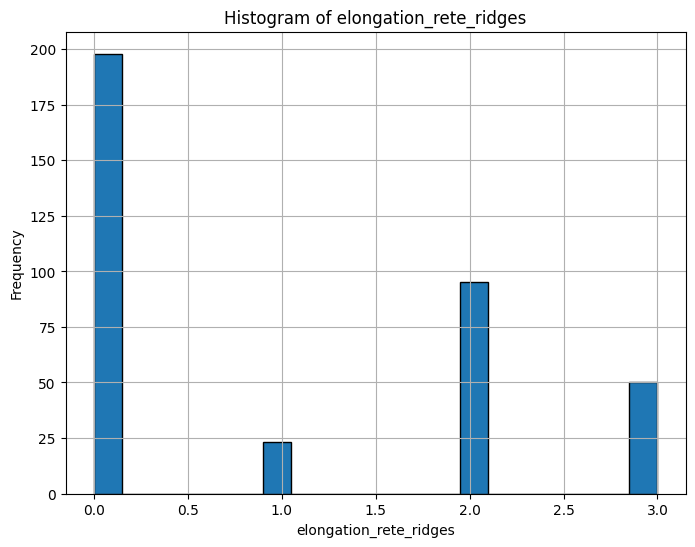

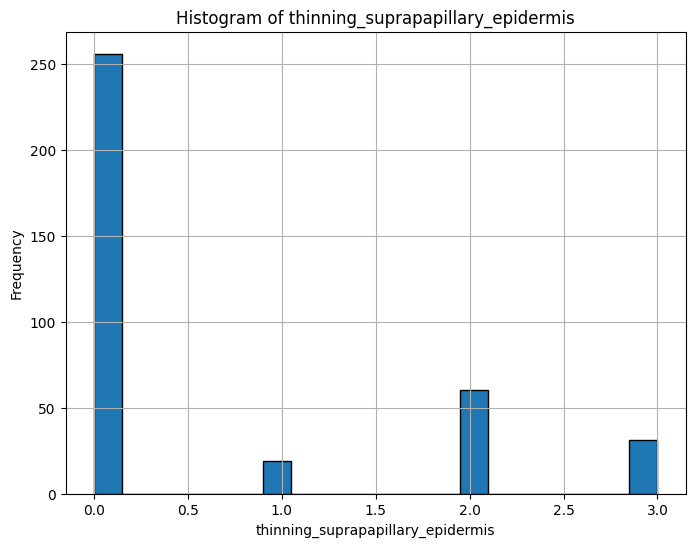

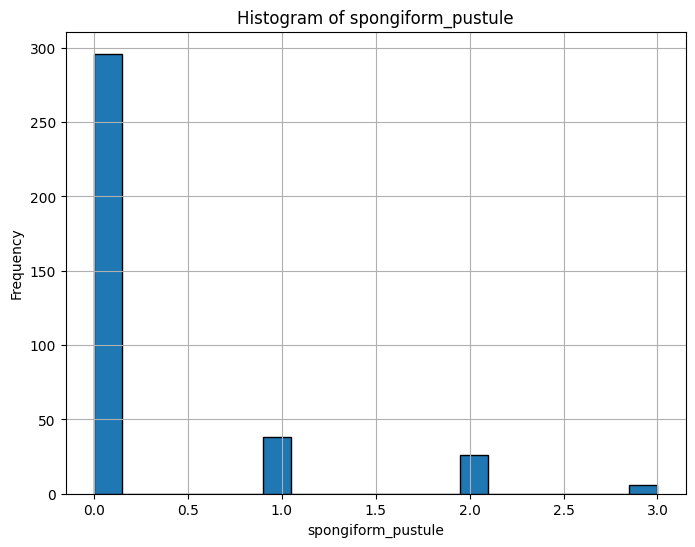

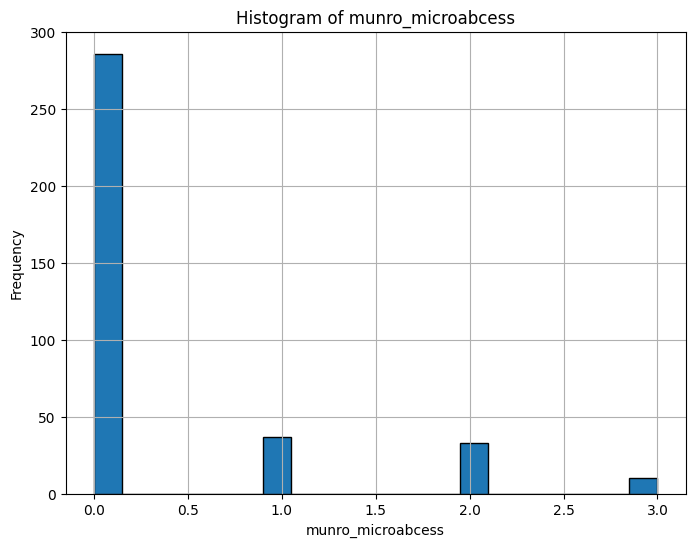

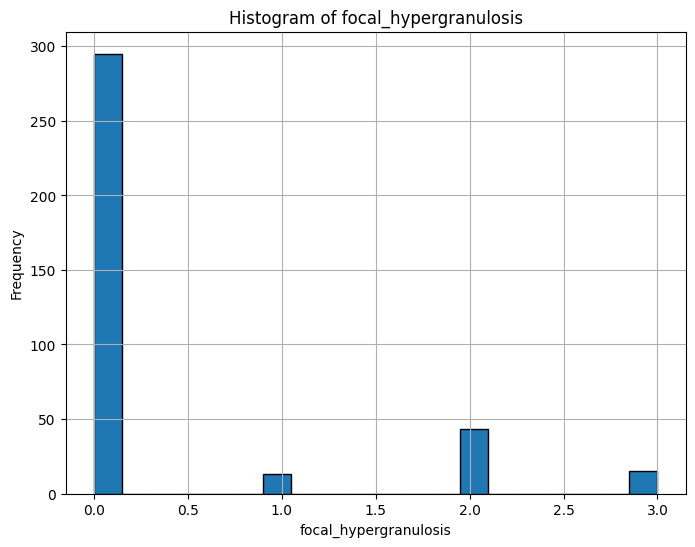

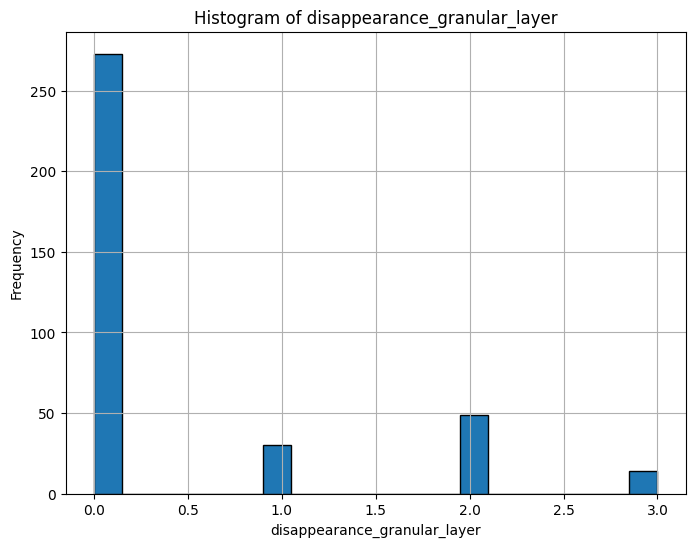

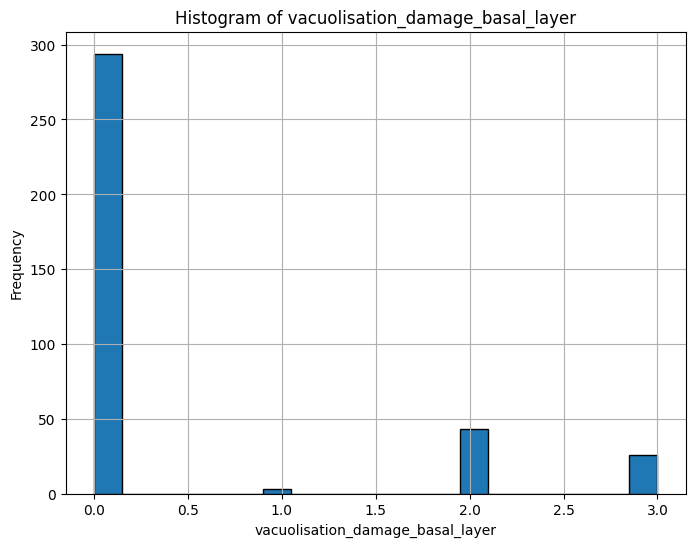

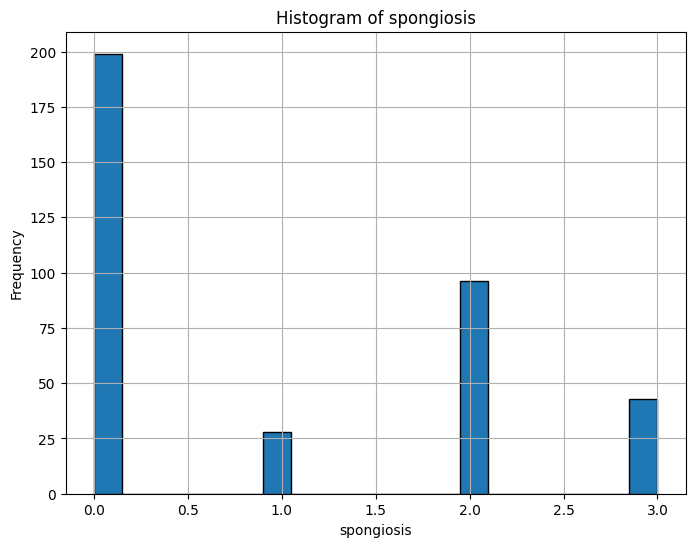

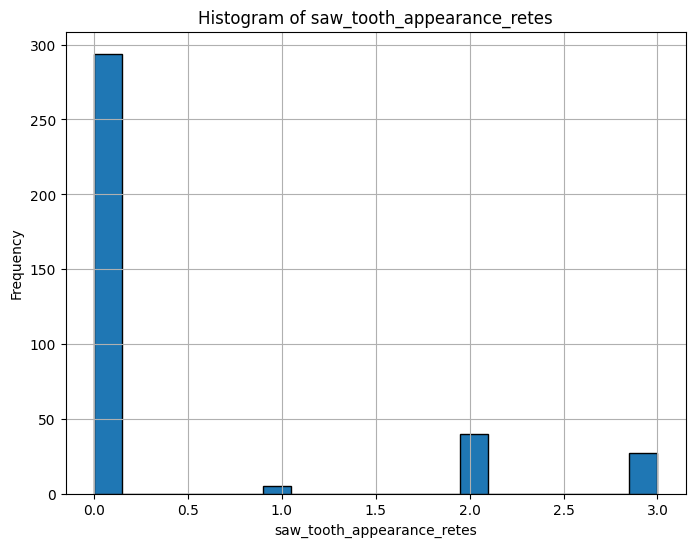

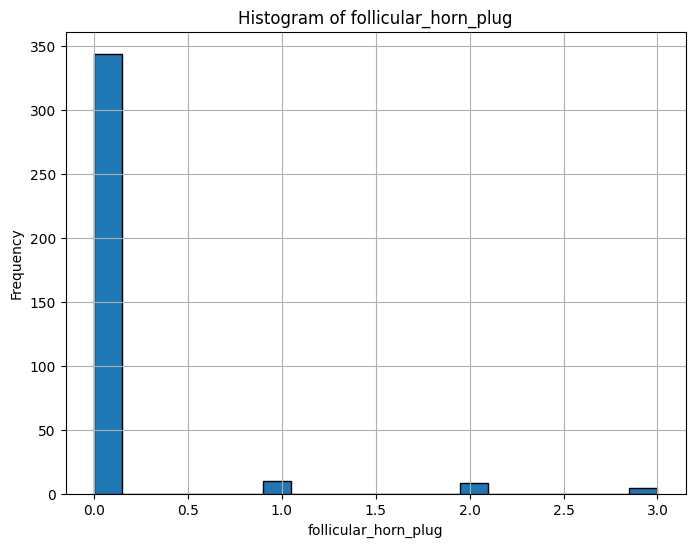

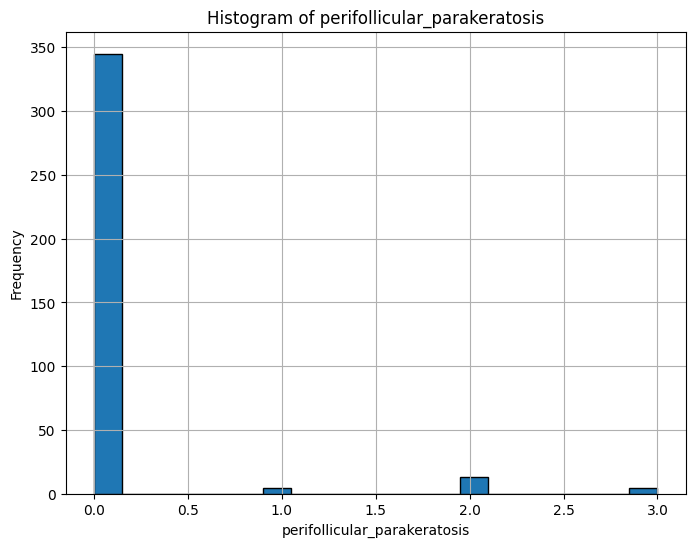

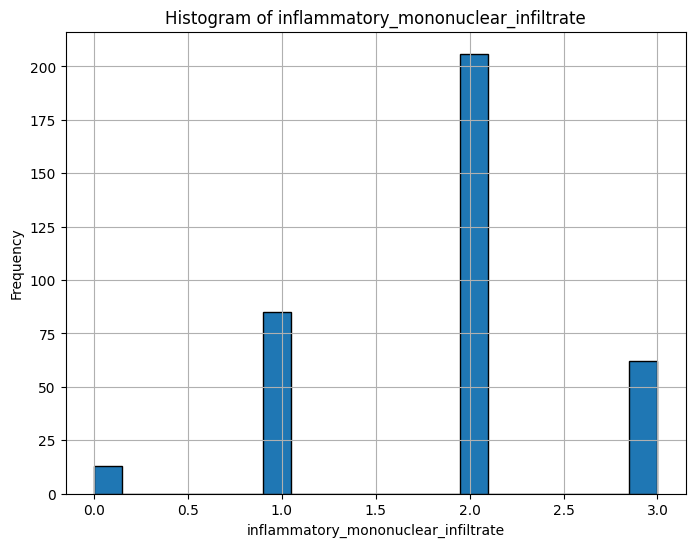

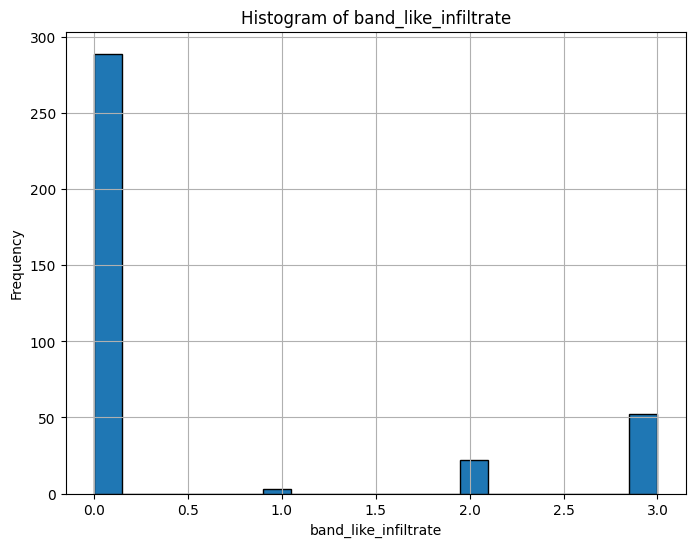

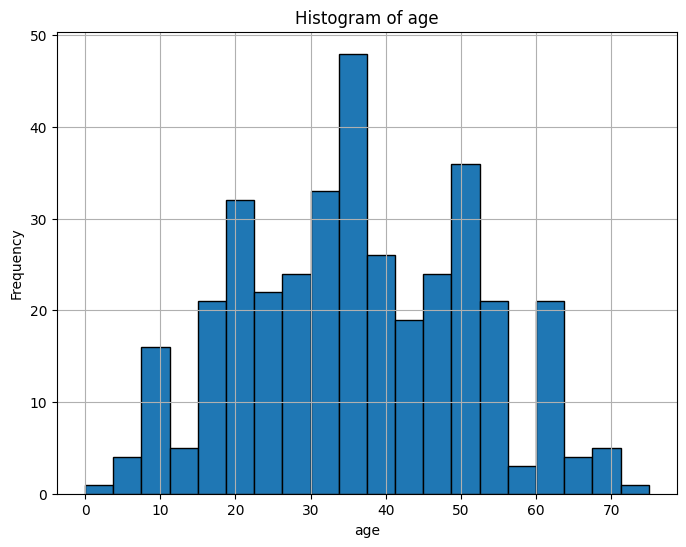

In [10]:
import matplotlib.pyplot as plt

for column in X.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(X[column], bins=20, edgecolor='black')  # Adjust bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()